# Time Series Analysis using Oil price

In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt, rcParams, style
import seaborn as sns
import matplotlib.dates as mdates
from calendar import month_name as mn

### Basic analysis and clean up data

In [2]:
oil = pd.read_csv("F:/code/EDX_Introduction_DataScience_Python/data_analysis_problem/understand_data/store-sales-time-series-forecasting/oil.csv")

In [3]:
oil.head()

,date,dcoilwtico
0,2013-01-01,NaN
1,2013-01-02,93.14
2,2013-01-03,92.97
3,2013-01-04,93.12
4,2013-01-07,93.20


In [4]:
oil.isnull().any()

date          False
dcoilwtico     True
dtype: bool

In [5]:
##rename the columns
oil.rename(columns = {'dcoilwtico':'price'}, inplace = True)

In [6]:
oil.head()

,date,price
0,2013-01-01,NaN
1,2013-01-02,93.14
2,2013-01-03,92.97
3,2013-01-04,93.12
4,2013-01-07,93.20


In [7]:
oil.dropna(inplace=True)

In [8]:
oil.head()

,date,price
1,2013-01-02,93.14
2,2013-01-03,92.97
3,2013-01-04,93.12
4,2013-01-07,93.20
5,2013-01-08,93.21


In [9]:
# Convert the 'Date' column to datetime
oil['date'] = pd.to_datetime(oil['date'])

# Sort the dataframe by the 'Date' column
oil.sort_values(by='date', inplace=True)
oil.reset_index(drop=True, inplace=True)

In [10]:
oil.head()

,date,price
0,2013-01-02,93.14
1,2013-01-03,92.97
2,2013-01-04,93.12
3,2013-01-07,93.20
4,2013-01-08,93.21


In [11]:
oil.dtypes

date     datetime64[ns]
price           float64
dtype: object

In [12]:
oil.reset_index(inplace=True)

In [13]:
print(oil['date'].min())
print(oil['date'].max())

2013-01-02 00:00:00
2017-08-31 00:00:00


### Starting the analysis
#### Plot the oil price

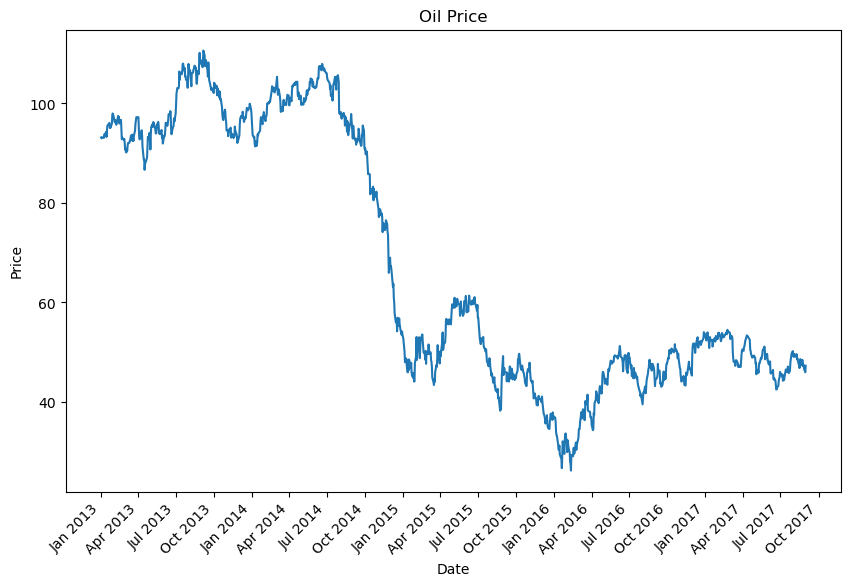

In [14]:
oil.set_index('date', inplace=True)

# Create plot
fig, ax = plt.subplots(figsize=(10, 6)) # Set figure size as desired
ax.plot(oil.index, oil['price']) # Plot the data
ax.set_xlabel('Date') # Set x-axis label
ax.set_ylabel('Price') # Set y-axis label
ax.set_title('Oil Price') # Set plot title

# Format x-axis ticks
ax.xaxis.set_major_locator(mdates.MonthLocator(bymonth=[1, 4, 7, 10])) # Set month locator for x-axis
ax.xaxis.set_major_formatter(mdates.DateFormatter('%b %Y')) # Set date format for x-axis labels
plt.xticks(rotation=45, ha='right') # Rotate x-axis labels for better readability


plt.show() # Show the plot



Above graph seems to exihibit the pattern, but it might not be cleary visible. 
Next we are trying to divide the data based on year and place the vertically


In [15]:
# Set date column as index
oil.reset_index(inplace=True)
oil['m'] = oil['date'].dt.month
oil['y'] = oil['date'].dt.year

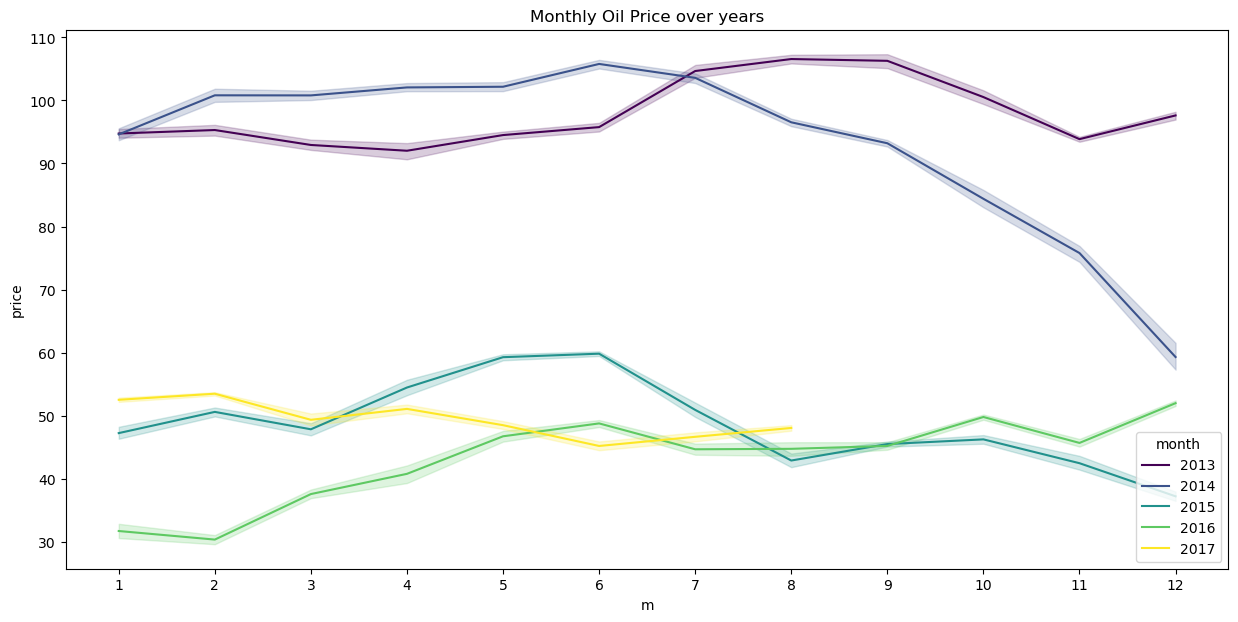

In [16]:
oil_copy = oil.copy()
ax = sns.lineplot(data=oil_copy, x='m', y='price',
                  hue='y', palette='viridis')
ax.figure.set_size_inches(15, 7)
ax.set_xticks(oil_copy['m'].unique())
ax.set_title('Monthly Oil Price over years')
ax.legend(ax.lines, oil_copy['y'].unique(), title='month', loc='lower right')
plt.show()